In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

from mlxtend.frequent_patterns import apriori, association_rules
import numpy as np


In [4]:
df = pd.read_csv("dados_unificados_limpo.csv", sep=";", encoding="latin-1")
print(df.head())
print(df.columns)



  Região/Unidade da Federação  Faixa Etária  Taxa_Mortalidade  Taxa_Obitos  \
0                        Acre    1 a 4 anos              0.41          6.0   
1                        Acre  10 a 14 anos              0.25          3.0   
2                        Acre  15 a 19 anos              0.26          9.0   
3                        Acre  20 a 24 anos              0.38         18.0   
4                        Acre  25 a 29 anos              0.43         20.0   

   Taxa_Internacoes  
0            1467.0  
1            1187.0  
2            3520.0  
3            4717.0  
4            4668.0  
Index(['Região/Unidade da Federação', 'Faixa Etária', 'Taxa_Mortalidade',
       'Taxa_Obitos', 'Taxa_Internacoes'],
      dtype='object')


In [5]:
num_cols = ["Taxa_Mortalidade", "Taxa_Obitos", "Taxa_Internacoes"]

for col in num_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")


In [6]:
df_filled = df.fillna(df.mean(numeric_only=True))



In [7]:
scaler = StandardScaler()
X = scaler.fit_transform(df_filled[num_cols])


c:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak o

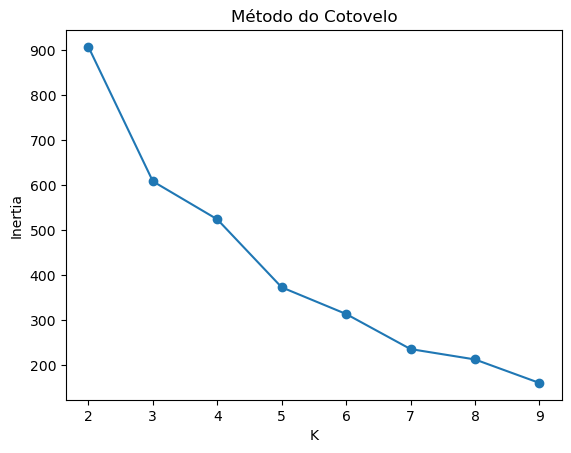

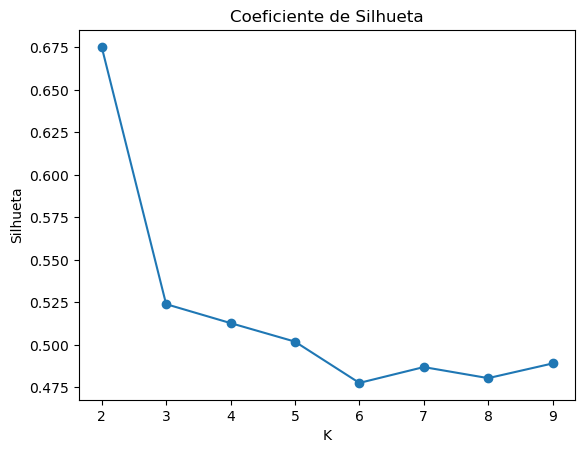

In [8]:
inertias = []
silhuetas = []
K_list = range(2, 10)

for k in K_list:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    inertias.append(kmeans.inertia_)
    silhuetas.append(silhouette_score(X, labels))

plt.plot(K_list, inertias, marker='o')
plt.title("Método do Cotovelo")
plt.xlabel("K")
plt.ylabel("Inertia")
plt.show()

plt.plot(K_list, silhuetas, marker='o')
plt.title("Coeficiente de Silhueta")
plt.xlabel("K")
plt.ylabel("Silhueta")
plt.show()



In [ ]:
colunas_numericas = ["Taxa_Mortalidade", "Taxa_Obitos", "Taxa_Internacoes"] #Seleção de Características

df_estados = df_filled.groupby("Região/Unidade da Federação")[colunas_numericas].mean() #Agregação

scaler = StandardScaler()
X_estados = scaler.fit_transform(df_estados) #Padronização (Escalonamento)


inertias = []
silhuetas = []
K_list = range(2, 10)

for k in K_list:
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(X_estados)
    inertias.append(km.inertia_)
    silhuetas.append(silhouette_score(X_estados, labels)) 

k_otimo = 3

kmeans_estados = KMeans(n_clusters=k_otimo, random_state=42)
df_estados["Cluster"] = kmeans_estados.fit_predict(X_estados)

df_estados_cluster = df_estados.reset_index()
df_estados_cluster


c:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak o

Região/Unidade da Federação  Taxa_Mortalidade  Taxa_Obitos  \
0                         Acre          4.253889    69.611111   
1                      Alagoas          5.282778   309.888889   
2                        Amapá          3.293333    61.222222   
3                     Amazonas          4.316111   338.777778   
4                        Bahia          3.901667  1566.888889   
5                        Ceará          3.993333   985.722222   
6             Distrito Federal          3.887778   296.611111   
7               Espírito Santo          3.468333   506.611111   
8                        Goiás          3.515000   689.444444   
9                     Maranhão          3.518889   616.833333   
10                 Mato Grosso          3.695556   342.388889   
11          Mato Grosso do Sul          4.003889   372.222222   
12                Minas Gerais          3.705337  2912.430691   
13                      Paraná          3.333889  1751.833333   
14                     Paraíba          4.881111   535.611111   
15                        Pará          3.627778   670.666667   
16                  Pernambuco          4.112222  1175.333333   
17                       Piauí          3.793333   323.166667   
18         Rio Grande do Norte          3.650000   349.333333   
19           Rio Grande do Sul          4.183333  1899.500000   
20              Rio de Janeiro          5.818333  2481.611111   
21                    Rondônia          3.442222   178.388889   
22                     Roraima          4.190556    38.277778   
23              Santa Catarina          3.509444  1096.222222   
24                     Sergipe          5.122222   235.166667   
25                   São Paulo          4.471667  6227.833333   
26                   Tocantins          3.893889   163.666667   

    Taxa_Internacoes  Cluster  
0        2318.888889        0  
1        6840.388889        2  
2        2437.500000        0  
3       10392.166667        0  
4       39664.500000        0  
5       24292.277778        0  
6       10392.500000        0  
7       13115.833333        0  
8       18763.277778        0  
9       19788.722222        0  
10      10347.833333        0  
11       8867.777778        0  
12      62457.789474        0  
13      44926.944444        0  
14      10512.944444        2  
15      22960.611111        0  
16      27645.500000        0  
17       8726.555556        0  
18       9347.888889        0  
19      35320.888889        0  
20      37488.055556        2  
21       5464.666667        0  
22       1395.500000        0  
23      28380.333333        0  
24       5066.000000        2  
25     120547.944444        1  
26       4595.777778        0

In [12]:
import matplotlib.pyplot as plt

coords = {
    "RONDÔNIA": (1, 6),
    "ACRE": (0, 6),
    "AMAZONAS": (0.5, 7),
    "RORAIMA": (1, 8),
    "PARÁ": (2.5, 7),
    "AMAPÁ": (3, 8),
    "TOCANTINS": (3, 6),
    "MARANHÃO": (4, 7),
    "PIAUÍ": (5, 7),
    "CEARÁ": (6, 7),
    "RIO GRANDE DO NORTE": (7, 7.2),
    "PARAÍBA": (7.3, 7),
    "PERNAMBUCO": (7.6, 6.8),
    "ALAGOAS": (7.3, 6.5),
    "SERGIPE": (7.5, 6.3),
    "BAHIA": (6, 6),
    "MATO GROSSO": (2, 5),
    "MATO GROSSO DO SUL": (2, 4),
    "GOIÁS": (3.5, 5),
    "DISTRITO FEDERAL": (3.7, 5.2),
    "MINAS GERAIS": (5.5, 5.2),
    "ESPÍRITO SANTO": (6.8, 5.4),
    "RIO DE JANEIRO": (6.5, 5),
    "SÃO PAULO": (5.8, 4.5),
    "PARANÁ": (5, 3.5),
    "SANTA CATARINA": (5, 2.8),
    "RIO GRANDE DO SUL": (5, 2),
}

siglas = {
    "RONDÔNIA": "RO",
    "ACRE": "AC",
    "AMAZONAS": "AM",
    "RORAIMA": "RR",
    "PARÁ": "PA",
    "AMAPÁ": "AP",
    "TOCANTINS": "TO",
    "MARANHÃO": "MA",
    "PIAUÍ": "PI",
    "CEARÁ": "CE",
    "RIO GRANDE DO NORTE": "RN",
    "PARAÍBA": "PB",
    "PERNAMBUCO": "PE",
    "ALAGOAS": "AL",
    "SERGIPE": "SE",
    "BAHIA": "BA",
    "MATO GROSSO": "MT",
    "MATO GROSSO DO SUL": "MS",
    "GOIÁS": "GO",
    "DISTRITO FEDERAL": "DF",
    "MINAS GERAIS": "MG",
    "ESPÍRITO SANTO": "ES",
    "RIO DE JANEIRO": "RJ",
    "SÃO PAULO": "SP",
    "PARANÁ": "PR",
    "SANTA CATARINA": "SC",
    "RIO GRANDE DO SUL": "RS",
}

df_plot = df_estados_cluster.copy()
df_plot["Região/Unidade da Federação"] = df_plot["Região/Unidade da Federação"].str.upper()

plt.figure(figsize=(10, 10))

clusters_plotados = set()

for _, row in df_plot.iterrows():
    estado = row["Região/Unidade da Federação"]
    cluster = int(row["Cluster"])

    if estado not in coords:
        continue

    x, y = coords[estado]

    if cluster not in clusters_plotados:
        plt.scatter(x, y, s=600, c=f"C{cluster}", label=f"Cluster {cluster}")
        clusters_plotados.add(cluster)
    else:
        plt.scatter(x, y, s=600, c=f"C{cluster}")

    texto = siglas.get(estado, estado[:3])
    plt.text(x, y, texto, color="black", ha="center", va="center", fontsize=10, fontweight="bold")

plt.legend(title="Clusters")
plt.title("Mapa conceitual do Brasil por Cluster (sem shapefile)")
plt.axis("off")
plt.show()

 

In [13]:
df_interpretacao = df_estados_cluster.groupby("Cluster")[["Taxa_Mortalidade", "Taxa_Obitos", "Taxa_Internacoes"]].mean()

# Arredonda para 2 casas decimais
df_interpretacao_arred = df_interpretacao.round(2)

# Formata com vírgula como separador decimal
df_interpretacao_formatado = df_interpretacao_arred.astype(str).apply(
    lambda col: col.str.replace('.', ',', regex=False)
)

df_interpretacao_arred
df_interpretacao_formatado


Taxa_Mortalidade Taxa_Obitos Taxa_Internacoes
Cluster                                              
0                   3,79      745,69         18709,26
1                   4,47     6227,83        120547,94
2                   5,28      890,57         14976,85

In [15]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

taxa_cols = ["Taxa_Mortalidade", "Taxa_Obitos", "Taxa_Internacoes"]

df_ap = df_filled.copy()

for col in taxa_cols:
    df_ap[col + "_faixa"] = pd.qcut(
        df_ap[col],
        q=3,
        labels=["Baixa", "Média", "Alta"]
    )

df_ap["Região/Unidade da Federação"] = df_ap["Região/Unidade da Federação"].str.upper()
df_estados_cluster["Região/Unidade da Federação"] = df_estados_cluster["Região/Unidade da Federação"].str.upper()

df_ap = df_ap.merge(
    df_estados_cluster[["Região/Unidade da Federação", "Cluster"]],
    on="Região/Unidade da Federação",
    how="left"
)

colunas_para_regras = [
    "Faixa Etária",
    "Região/Unidade da Federação",
    "Taxa_Mortalidade_faixa",
    "Taxa_Obitos_faixa",
    "Taxa_Internacoes_faixa",
    "Cluster"
]

df_cat = df_ap[colunas_para_regras].astype(str)
df_onehot = pd.get_dummies(df_cat, prefix_sep="=")

frequent_itemsets = apriori(df_onehot, min_support=0.05, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6)
rules = rules.sort_values("lift", ascending=False)




In [16]:
frequent_itemsets = apriori(df_onehot, min_support=0.05, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6)

rules = rules.sort_values("lift", ascending=False)
rules.head()


antecedents  \
32                           (Faixa Etária=5 a 9 anos)   
107  (Taxa_Mortalidade_faixa=Média, Taxa_Obitos_fai...   
16                          (Faixa Etária=Menor 1 ano)   
45   (Taxa_Mortalidade_faixa=Baixa, Taxa_Internacoe...   
6                          (Faixa Etária=35 a 39 anos)   

                                           consequents  antecedent support  \
32   (Taxa_Mortalidade_faixa=Baixa, Taxa_Obitos_fai...            0.055441   
107          (Taxa_Internacoes_faixa=Baixa, Cluster=0)            0.069815   
16                      (Taxa_Mortalidade_faixa=Média)            0.055441   
45                           (Taxa_Obitos_faixa=Baixa)            0.121150   
6                       (Taxa_Mortalidade_faixa=Média)            0.055441   

     consequent support   support  confidence      lift  representativity  \
32             0.248460  0.051335    0.925926  3.726661               1.0   
107            0.266940  0.057495    0.823529  3.085068               1.0   
16             0.332649  0.055441    1.000000  3.006173               1.0   
45             0.332649  0.121150    1.000000  3.006173               1.0   
6              0.332649  0.055441    1.000000  3.006173               1.0   

     leverage  conviction  zhangs_metric   jaccard  certainty  kulczynski  
32   0.037560   10.145791       0.774609  0.203252   0.901437    0.566269  
107  0.038858    4.154004       0.726585  0.205882   0.759268    0.519457  
16   0.036999         inf       0.706522  0.166667   1.000000    0.583333  
45   0.080850         inf       0.759346  0.364198   1.000000    0.682099  
6    0.036999         inf       0.706522  0.166667   1.000000    0.583333